# Inference on Masked Images
This notebook performs inference using a pre-trained model to predict grid-based RGB values for masked images.
The results are plotted in the original format.

---
## Imports

In [4]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from inference_function_neural_network import run_inference_neural_network

## Load Masked Images
We load all masked images from the `Reference_Images` directory. Each image is:

1. **Sorted** to ensure consistent order.
2. **Opened** using the `Pillow` library in RGB format.
3. Stored in a list for further processing.

The total number of images is printed at the end.


In [5]:
# Path to the Reference_Images directory
reference_images_dir = os.path.abspath(os.path.join("..", "Reference_Images"))

# Verify the directory exists
if not os.path.exists(reference_images_dir):
    raise FileNotFoundError(f"Reference Images directory not found: {reference_images_dir}")

# Load images from the directory
masked_images = []
masked_image_files = sorted(os.listdir(reference_images_dir))

for file_name in masked_image_files:
    image_path = os.path.join(reference_images_dir, file_name)
    if os.path.isfile(image_path):  # Ensure it's a file
        try:
            img = Image.open(image_path).convert("RGB")  # Open as PIL.Image
            masked_images.append(img)
        except Exception as e:
            print(f"Error loading file {file_name}: {e}")

print(f"Loaded {len(masked_images)} masked images for inference.")

Loaded 10 masked images for inference.


## Run Inference and Plot Results
1. **Model Path**: The path to the saved model (`color_predictor_weights.pth`) is defined.
2. **Inference**: The `run_inference` function is called on the loaded masked images, with predictions returned for each image grid.
3. **Visualization**:
   - The **original image** is displayed on the left.
   - The **predicted grid** (mean RGB values per grid cell) is displayed on the right.
4. **Layout**: The images and grids are displayed side-by-side for comparison.

This visualization allows us to assess the performance of the model in predicting the color grids for the masked images.


Model Path Resolved: ..\saved_models\Neural_network\NeuralNetwork_ImageReconstruction.pth


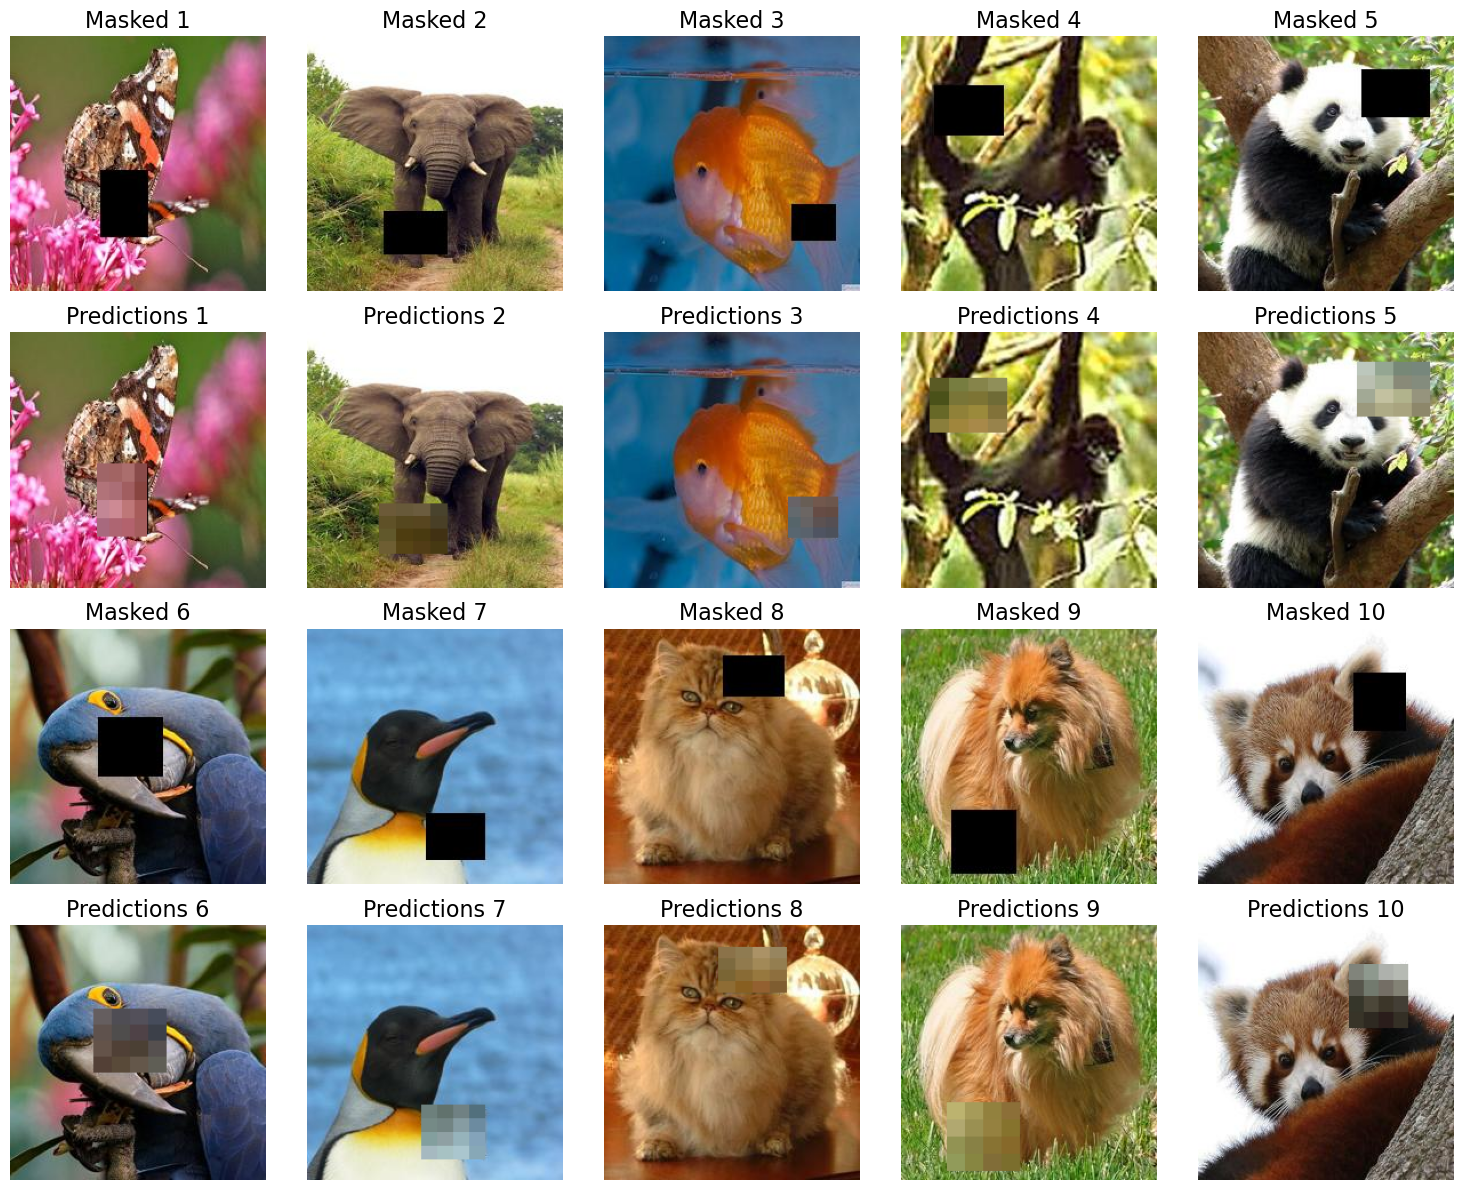

In [6]:
# Model path
model_path = os.path.join("..", "saved_models", "Neural_network", "NeuralNetwork_ImageReconstruction.pth")
if not os.path.isfile(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")
else:
    print(f"Model Path Resolved: {model_path}")

# Set grid size and device
grid_size = 4  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Run inference
try:
    results = run_inference_neural_network(model_path, masked_images, grid_size=grid_size, device=device)
except Exception as e:
    raise RuntimeError(f"Error during inference: {e}")

# Plot results with 5 images per row
num_images = len(masked_images)
rows = 4  # Fixed number of rows (2 for masked, 2 for predictions)
cols = 5  # Fixed number of columns per row
fig, axs = plt.subplots(rows, cols, figsize=(15, 12))  # Create a 4-row, 5-column grid

# Iterate through the images and populate the grid
for i in range(5):
    # Row 1: Masked images
    axs[0, i].imshow(masked_images[i])
    axs[0, i].axis("off")
    axs[0, i].set_title(f"Masked {i+1}", fontsize=16)

    # Row 2: Predictions
    axs[1, i].imshow(results[i])
    axs[1, i].axis("off")
    axs[1, i].set_title(f"Predictions {i+1}", fontsize=16)

for i in range(5, 10):
    # Row 3: Masked images
    axs[2, i - 5].imshow(masked_images[i])
    axs[2, i - 5].axis("off")
    axs[2, i - 5].set_title(f"Masked {i+1}", fontsize=16)

    # Row 4: Predictions
    axs[3, i - 5].imshow(results[i])
    axs[3, i - 5].axis("off")
    axs[3, i - 5].set_title(f"Predictions {i+1}", fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
